In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import display
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import minmax_scale

In [2]:
# Matplotlib defaults
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.labelsize'] = 'medium'
plt.rcParams['ytick.labelsize'] = 'medium'
plt.rcParams['legend.fontsize'] = 'x-small'
plt.rcParams["figure.dpi"] = 150
plt.rcParams["lines.linewidth"] = 2

In [3]:
def sim(a,b):
    diff = np.abs(a-b)
    s = np.exp(-np.dot(diff,diff))
    return s

max_iterations = 100
plot_every = 20

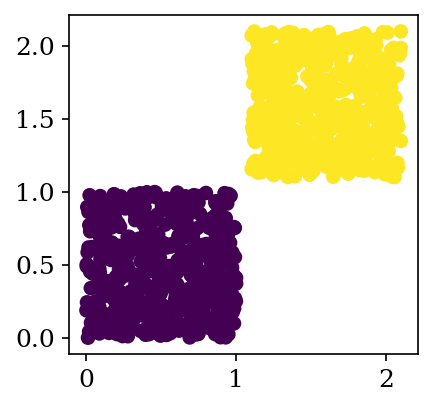

In [4]:
# Generate test data
N = 1000
d = 1.1
x = np.concatenate((np.random.rand(N//2),np.random.rand(N//2)+d))
y = np.concatenate((np.random.rand(N//2),np.random.rand(N//2)+d))
z = np.concatenate((np.zeros(N//2),np.zeros(N//2)+1))
real = np.array(list(zip(x,y,z)))
data = np.array(list(zip(x,y)))
np.random.shuffle(data)

# plot test data
plt.figure(figsize=(3,3))
plt.scatter(x,y,c=z)

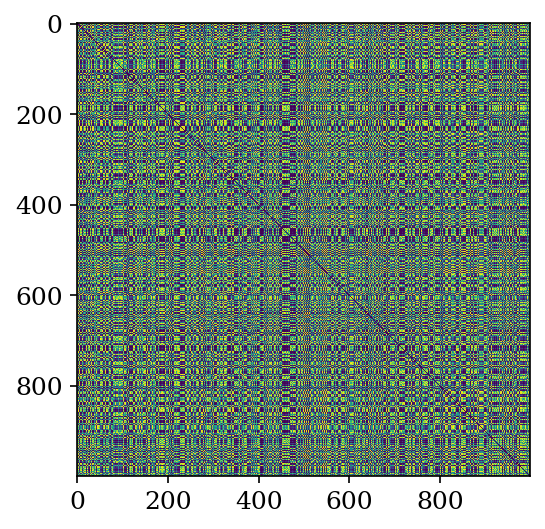

In [5]:
# Calculate Affinity matrix A
N = len(data)
A = np.zeros((N,N))
for i in range(N-1):
    for j in range(i+1,N):
        A[i, j] = sim(data[i], data[j])
A = A + A.T
plt.imshow(A)

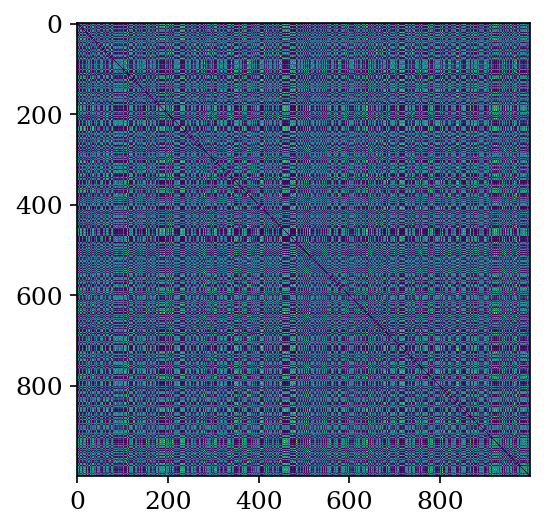

In [6]:
# Calculate the normalized affinity matrix W
D = np.sum(A,axis=1)
W = 1./D*A
plt.imshow(W)

39


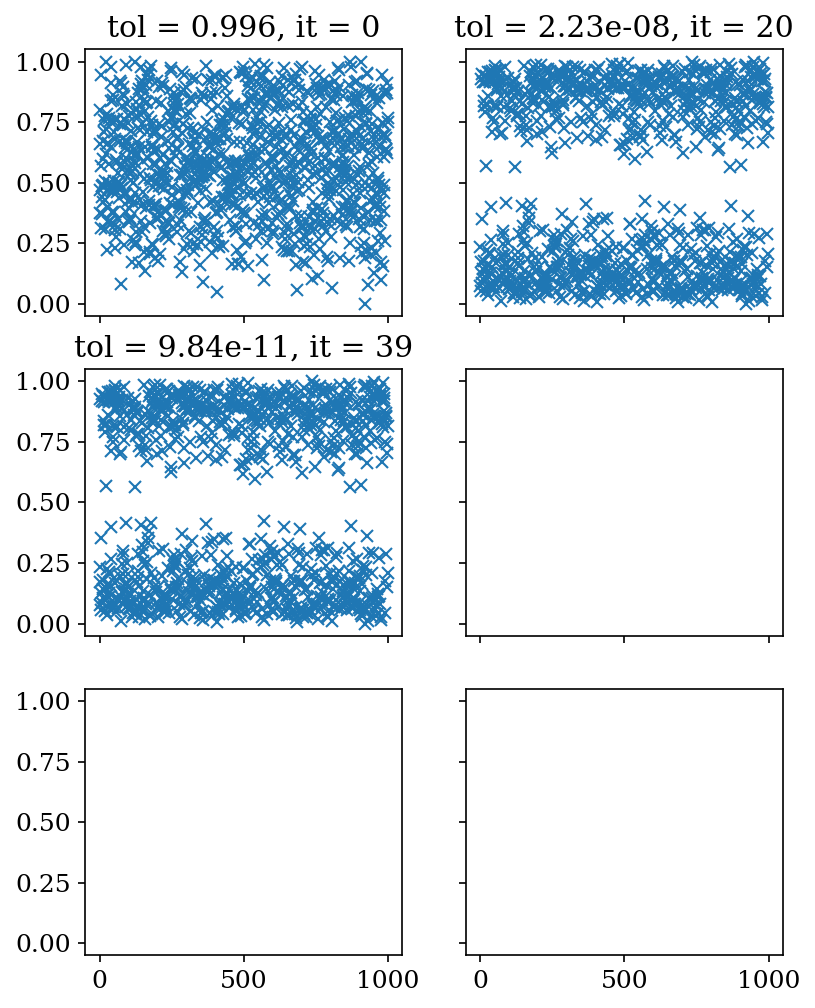

In [7]:
numplots = max_iterations//plot_every
fig, axes = plt.subplots(
    numplots//2+1,
    2,
    figsize=(6,8),
    sharex=True,
    sharey=True,
)
axes = list(axes.flatten())

v = np.sum(A,axis=1)/np.sum(A)
delta = 1.
for i in range(max_iterations):
    v_prev = v
    delta_prev = delta
    v = np.dot(v,W)
    v = v/np.linalg.norm(v,ord=1)

    delta = np.linalg.norm(v_prev - v)
    tol = np.abs(delta_prev - delta)
    
    if np.mod(i,plot_every) == 0:
        ax = axes.pop(0)
        ax.plot(minmax_scale(v),'x')
        ax.set_title(
            'tol = {0:1.3g}, it = {1}'.format(
                tol,
                i,
            )
        )
    
    if 1e-10 > tol:
        break
        

print(i)

ax = axes.pop(0)
ax.plot(minmax_scale(v),'x')
ax.set_title(
    'tol = {0:1.3g}, it = {1}'.format(
        tol,
        i,
    )
)

v=minmax_scale(v)
v=v.reshape(-1,1)

Text(0.5, 1.0, 'actual')

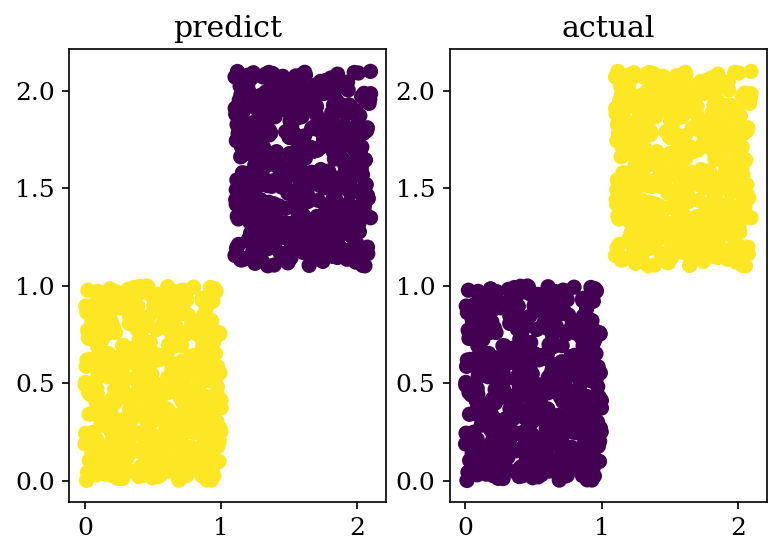

In [8]:
gmm = GaussianMixture(n_components=2).fit(v)
labels = gmm.predict(v)
fig, axes = plt.subplots(1,2)
axes[0].scatter(data[:,0],data[:, 1], c=labels, s=40, cmap='viridis')
axes[0].set_title('predict')
axes[1].scatter(real[:,0],real[:, 1], c=real[:,2], s=40, cmap='viridis')
axes[1].set_title('actual')

Text(0.5, 1.0, 'actual')

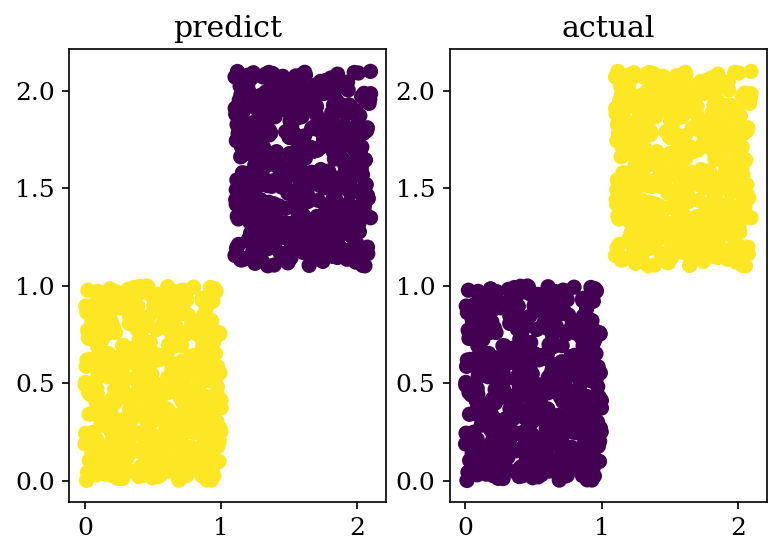

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(v)
labels = kmeans.labels_
fig, axes = plt.subplots(1,2)
axes[0].scatter(data[:,0],data[:, 1], c=labels, s=40, cmap='viridis')
axes[0].set_title('predict')
axes[1].scatter(real[:,0],real[:, 1], c=real[:,2], s=40, cmap='viridis')
axes[1].set_title('actual')

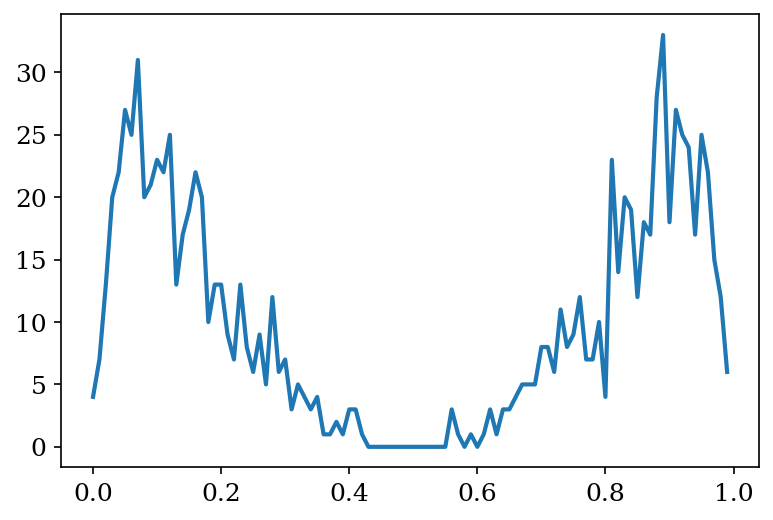

In [10]:
plt.figure()
hist, bin_edges = np.histogram(v, bins=100)
plt.plot(bin_edges[:-1], hist)

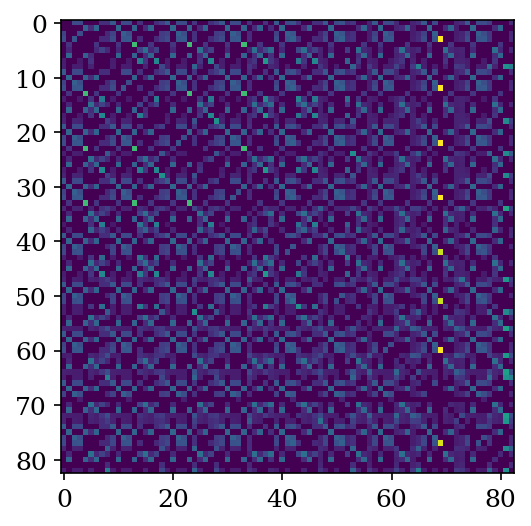

In [13]:
A = np.load('../sim_mat.pkl')
# Calculate the normalized affinity matrix W
D = np.sum(A,axis=1)
W = 1./D*A
plt.imshow(W)

99


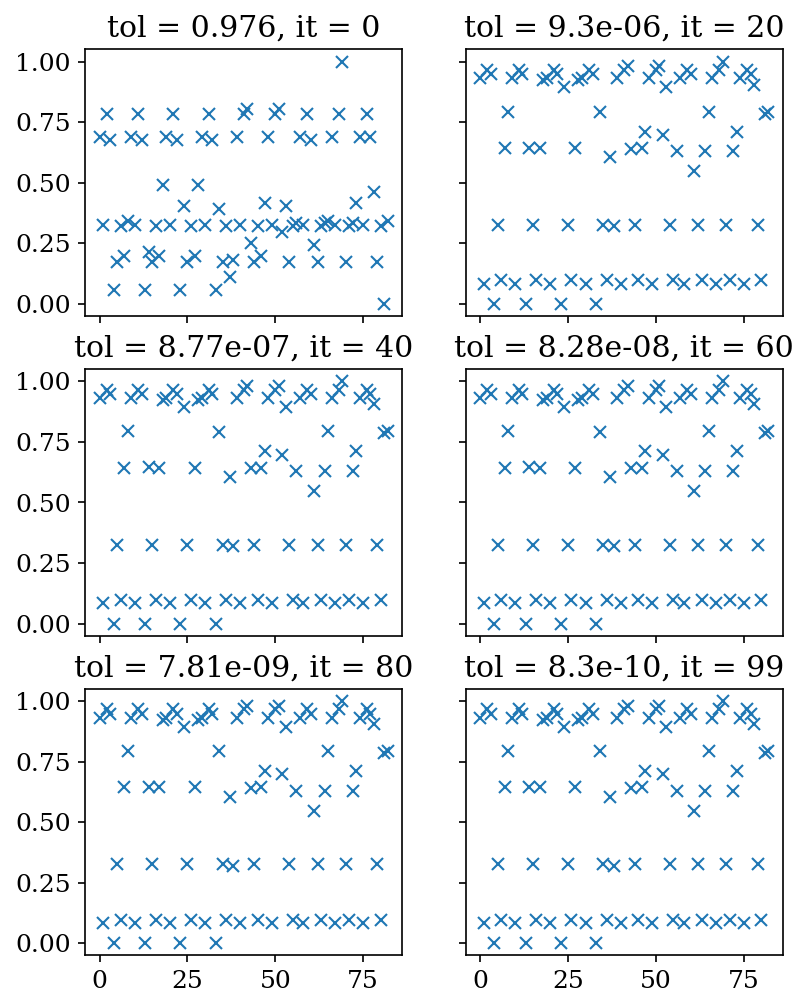

In [14]:
numplots = max_iterations//plot_every
fig, axes = plt.subplots(
    numplots//2+1,
    2,
    figsize=(6,8),
    sharex=True,
    sharey=True,
)
axes = list(axes.flatten())

v = np.sum(A,axis=1)/np.sum(A)
delta = 1.
for i in range(max_iterations):
    v_prev = v
    delta_prev = delta
    v = np.dot(v,W)
    v = v/np.linalg.norm(v,ord=1)

    delta = np.linalg.norm(v_prev - v)
    tol = np.abs(delta_prev - delta)
    
    if np.mod(i,plot_every) == 0:
        ax = axes.pop(0)
        ax.plot(minmax_scale(v),'x')
        ax.set_title(
            'tol = {0:1.3g}, it = {1}'.format(
                tol,
                i,
            )
        )
    
    if 1e-10 > tol:
        break
        

print(i)

ax = axes.pop(0)
ax.plot(minmax_scale(v),'x')
ax.set_title(
    'tol = {0:1.3g}, it = {1}'.format(
        tol,
        i,
    )
)

v=minmax_scale(v)
v=v.reshape(-1,1)

TypeError: Invalid shape (86652,) for image data

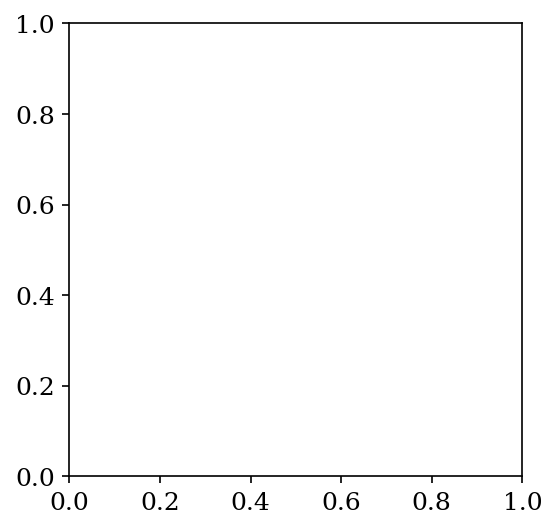

In [19]:
chars = np.load('../chars.pkl')
plt.imshow(chars.flatten())